# Сборный проект

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных
1. Name — название игры
2. Platform — платформа
3. Year_of_Release — год выпуска
4. Genre — жанр игры
5. NA_sales — продажи в Северной Америке (миллионы долларов)
6. EU_sales — продажи в Европе (миллионы долларов)
7. JP_sales — продажи в Японии (миллионы долларов)
8. Other_sales — продажи в других странах (миллионы долларов)
9. Critic_Score — оценка критиков (максимум 100)
10. User_Score — оценка пользователей (максимум 10)
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
df_games = pd.read_csv('/datasets/games.csv')

In [3]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df_games.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
2993,LEGO Harry Potter: Years 1-4,PSP,2010.0,Action,0.14,0.36,0.00,0.18,71.0,tbd,E10+
7918,Shaun White Skateboarding,PS3,2010.0,Sports,0.11,0.05,0.00,0.03,61.0,6.5,T
8656,Kidou Senshi Gundam: Giren no Yabou - Axis no ...,PSP,2008.0,Strategy,0.00,0.00,0.16,0.00,NaN,NaN,NaN
11010,Singstar: Ultimate Party,PS3,2014.0,Misc,0.00,0.08,0.00,0.01,NaN,NaN,NaN
5453,Harry Potter and the Deathly Hallows - Part 2,X360,2011.0,Action,0.19,0.11,0.00,0.03,44.0,5.4,T


In [5]:
print('Количество дубликатов: {}'.format(df_games.duplicated().sum()))

Количество дубликатов: 0


In [6]:
# Количество игр в датасете
len(df_games['Name'].unique())

11560

In [7]:
# Жанры
df_games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [8]:
# Возрастной рейтинг
df_games['Rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: Rating, dtype: int64

In [9]:
# Платформы
df_games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [10]:
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [11]:
def missing_data(col):
    return df_games[df_games[col].isnull()]
#Возвращает Series с пропусками в указанной колонке

In [12]:
missing_data('Name')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
missing_data('Year_of_Release')

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [14]:
print('Количество TBD: {}'.format(len(df_games.query("User_Score == 'tbd'"))))

Количество TBD: 2424


#### Выводы

1. В данных есть пропуски с названием игры - там к сожалению пропущен и жанр и имя - с одной стороны всего 2 строк, а с другой для платформы GEN это 2/29 ~7% от всех игр. Такие данные можно удалить, они не подпортят статистику
2. Есть пропуски у даты релиза - данных может не много но заменить можно. Для каждой игры можно взять диапозон в котором активно существовала платформа и после взять медианной значение этого диапозона
3. Так же для User_Score помимо пропусков есть значение tbd (Будет определено). Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным. Стоит отметить также, что у этой аббревиатуры могут быть и иные значения, например To Be Done - должно быть сделано, или To Be Discussed - подлежит обсуждению. 

# 2. Подготовка данных

#### Приведем названия признаков к нижнему регистр

In [15]:
df_games.columns = [i.lower() for i in list(df_games.columns)]

#### Название игры и жанр

Удаляем 2 столбца так как мы уже выяснили, что с этой ошибкой в данных мы ничего не сможем сделать.

In [16]:
df_games.drop(missing_data('name').index , inplace=True)

#### Год выпуска

269 пропусков из 16 715 записей – это ~1.6% датасета. Даже если мы не сумеем заполнить эти пропуски, ничего критичного не случится. 

In [17]:
# Выберем игры без года релиза
missing_data('year_of_release').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Можно попробовать заменить как было описано мной ранее в выводе, но что если некоторые игры есть и на других платформа. Если игра кросплатформенная обычна они выходят точно в один год

In [18]:
# Предположим, что пропуски есть у одной и той же игры на какой-то платформе
df_games.query("name == 'LEGO Batman: The Videogame'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Что и требовалось доказать - наша игра про бэтмана на остальных платорфмах вышла в один год - давайте заменим.

In [19]:
not_null_values = df_games[df_games['year_of_release'].notnull()]

In [20]:
def fill_year_of_release(row):
    col = 'year_of_release'
    rows = not_null_values[not_null_values['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [21]:
df_games['year_of_release'] = df_games.apply(fill_year_of_release, axis=1)

In [22]:
print('Количество пропусков у столбца год выпуска: {}'.format(len(missing_data('year_of_release'))))

Количество пропусков у столбца год выпуска: 146


Почти половину пропусков признака "Год выпуска" мы заполнили, но большую часть не смогли.

In [23]:
missing_data('year_of_release').head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.0,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T


Видим, что у игры Rock Band нет даты релиза. В интернете првоерять и заменять это глупо поэтому напишем функцию, которая будет вычеслять для каждой платформы медианное значения релиза и этим значением мы будем заменять

In [27]:
def fill_year_of_release_median(row):
    return not_null_values.loc[not_null_values['platform']==row['platform']]['year_of_release'].median()

In [31]:
df_games.loc[df_games["year_of_release"].isnull(),'year_of_release']= df_games.apply(fill_year_of_release_median, axis=1)

In [32]:
print('Количество пропусков у столбца год выпуска: {}'.format(len(missing_data('year_of_release'))))

Количество пропусков у столбца год выпуска: 0


In [33]:
df_games.isnull().sum().sort_values()/df_games.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
user_score         40.082570
rating             40.471489
critic_score       51.313349
dtype: float64

Со следующими пропусками сложнее. Можно попробовать заполнить их после изучения вариативности значений признаков выборочной совокупности, например, для каждой игры выбирать данные по такой же платформе и жанру и брать медиану. Но тогда, скорее всего, мы сдвинем распределение.

###### Оценка критиков
Максимальное значение равно 100
Количество пропусков ~51% датасета
###### Оценка пользователей
Максимальное значение равно 10
Количество пропусков ~40% датасета
###### Рейтинг от организации ESRB
Количество пропусков ~40.5% датасета

In [35]:
# Преобразуем неявные пропуски `tbd` в NaN
tbd = df_games['user_score'] != 'tbd'
df_games['user_score'].where(tbd, np.nan, inplace=True)

Проверим процентное соотношение теперь

In [36]:
df_games.isnull().sum().sort_values()/df_games.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating             40.471489
critic_score       51.313349
user_score         54.586250
dtype: float64

In [37]:
missing_data('critic_score').sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5676,Goosebumps HorrorLand,DS,2008.0,Adventure,0.29,0.0,0.00,0.02,NaN,NaN,E10+
9840,Greg Hastings Paintball 2,Wii,2010.0,Shooter,0.11,0.0,0.00,0.01,NaN,NaN,E10+
14126,Housekeeping,DS,2008.0,Action,0.00,0.0,0.04,0.00,NaN,NaN,NaN
11784,Little League World Series Baseball: Double Play,DS,2010.0,Sports,0.07,0.0,0.00,0.01,NaN,NaN,E
217,Dr. Mario,NES,1989.0,Puzzle,2.62,0.6,1.52,0.10,NaN,NaN,NaN


Вообщем ситуация такая же как с датой релиза. Если игра кросплатформенная рейтинг может на какой то платформе заполнен.

In [38]:
df_games.query("name == 'The Wolf Among Us'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
7407,The Wolf Among Us,PS4,2014.0,Adventure,0.10,0.07,0.0,0.04,83.0,8.4,M
11050,The Wolf Among Us,PS3,2014.0,Adventure,0.05,0.02,0.0,0.02,NaN,8.2,NaN
11717,The Wolf Among Us,XOne,2014.0,Adventure,0.05,0.02,0.0,0.01,NaN,8.5,M
13626,The Wolf Among Us,PSV,2014.0,Adventure,0.03,0.00,0.0,0.01,NaN,8.4,M
14652,The Wolf Among Us,X360,2014.0,Adventure,0.01,0.02,0.0,0.00,83.0,7.7,NaN


Что и требовалось доказать. Делаем похожую функцию, как и с датой релиза.

In [39]:
not_null_critic_score = df_games[df_games['critic_score'].notnull()]
not_null_user_score = df_games[df_games['user_score'].notnull()]
not_null_rating = df_games[df_games['rating'].notnull()]

In [40]:
def fill_critic_score(row):
    col = 'critic_score'
    rows = not_null_critic_score[not_null_critic_score['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

def fill_user_score(row):
    col = 'user_score'
    rows = not_null_user_score[not_null_user_score['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

def fill_rating(row):
    col = 'rating'
    rows = not_null_rating[not_null_rating['name'] == row['name']]
   
    if len(rows) > 0:
        return rows.iloc[0][col]
    
    return row[col]

In [41]:
df_games['critic_score'] = df_games.apply(fill_critic_score, axis=1)
df_games['user_score'] = df_games.apply(fill_user_score, axis=1)
df_games['rating'] = df_games.apply(fill_rating, axis=1)

In [42]:
df_games.isnull().sum().sort_values()/df_games.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating             37.856758
critic_score       45.563334
user_score         48.010531
dtype: float64

* user_score - заменили ~6.5% пропусков
* rating - заменили ~3% пропусков
* critic_score - заменили ~6% пропусков

Мало - но все ровно не плохо.

### Преобразуйте данные в нужные типы

In [43]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null float64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       9098 non-null float64
user_score         8689 non-null object
rating             10386 non-null object
dtypes: float64(6), object(5)
memory usage: 2.2+ MB


|Признак | Тип данных | Причина замены|
| ------------- |:-------------:| -----:|
|year_of_release | Int | Год должен быть целочисленным значением|
|user_score | float64 | Пользовательские рейтинги должны быть представлены числами|
|critic_score | Int64 | Критики выставляют рейтинги целыми числами|

Но пока что critic_score мы поставим тип float64, чтобы случайно не повлияло корреляцию 

In [44]:
df_games['year_of_release'] = df_games['year_of_release'].astype('int')
df_games['critic_score'] = df_games['critic_score'].astype('float64')
df_games['user_score'] = df_games['user_score'].astype('float64')

#### Корреляция данных между critic_score и user_score

Попробуем заметить зависимость рейтинга пользователей и критиков

In [45]:
print('Корреляция столбцов {}'.format(df_games['critic_score'].corr(df_games['user_score'])))

Корреляция столбцов 0.5866136956329191


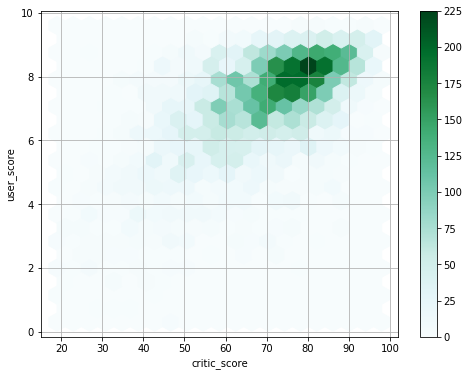

In [46]:
df_games.plot(x='critic_score', y='user_score', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

Корреляция в 0,59 говорит о наличии связи, однако не слишком сильной. 
* Возьмем данные user_score, которые не имеют null и для null critic_score поставим рейтинг такой же только умноженный на 10. 
* И наоборот Возьмем данные critic_score, которые не имеют null и для null user_score поставим рейтинг такой же только поделенный на 10.

In [47]:
import math

def fill_user_critic(row):
    if math.isnan(row['critic_score']) and not(math.isnan(row['user_score'])):
        return row['user_score']*10
    return row['critic_score']

def fill_critic_user(row):
    if math.isnan(row['user_score']) and not(math.isnan(row['critic_score'])):
        return row['critic_score']/10
    return row['user_score']

In [48]:
df_games['critic_score'] = df_games.apply(fill_user_critic, axis=1)
df_games['user_score'] = df_games.apply(fill_critic_user, axis=1)

In [49]:
df_games.isnull().sum().sort_values()/df_games.shape[0]*100

name                0.000000
platform            0.000000
year_of_release     0.000000
genre               0.000000
na_sales            0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
rating             37.856758
critic_score       43.552923
user_score         43.552923
dtype: float64

#### Вывод
* critic_score ~2% данных восстановили
* user_score ~4.5% данных восстановили

Преобразуем данные critic_score в нужный тип

In [50]:
df_games['critic_score'] = df_games['critic_score'].astype('Int64')

### Суммарные продажи во всех регионах

In [51]:
df_games['total_sales'] = df_games.loc[:,['na_sales', 'eu_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

### Вывод по Предобработке данных
Оставшиеся пропуски по рейтингам пока не удается заполнить. Теоретически, даже 60% датасета нам должно хватить для дальнейшего анализа и проверки гипотез. Оставим оставшиеся 40% пропусков у рейтингов пустыми.

# 3. Исследовательский анализ данных

## Сколько игр выпускалось в разные годы

In [52]:
games_per_year = (
    df_games[['name', 'year_of_release']]
        .drop_duplicates()
        .pivot_table(index='year_of_release', values='name', aggfunc='count')
        .sort_values('year_of_release', ascending=False)
)

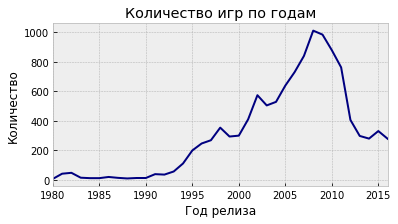

In [53]:
plt.style.use('bmh')

(
    games_per_year
        .plot(figsize=(6, 3), colormap='jet', legend=False, title='Количество игр по годам')
        .set(xlabel='Год релиза', ylabel='Количество')
)

plt.show()

Если предположить, что объем игрового рынка не был таким массовым до выхода консолей типа Sony PlayStation и широкого распространения персональных компьютеров, то нас не будут интересовать данные до середины девяностых. Да и мало кто хочет играть в старые игры, разве что настольгирующие хипстеры. Поэтому можем ограничиться десятилетним промежутком.

## Как менялись продажи по платформам

In [54]:
# Глобальные продажи по платформам
def total_sales_per_platform_for(df):
    return (
        df
            .pivot_table(index='platform', values='total_sales', aggfunc='sum')
            .sort_values('total_sales', ascending=False)
    )

In [55]:
# Столбчатая диаграмма глобальных продаж
def bar_plot(df):
    (
        df
            .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
            .set(xlabel='Платформа', ylabel='Глобальные продажи')
    )
    plt.show()

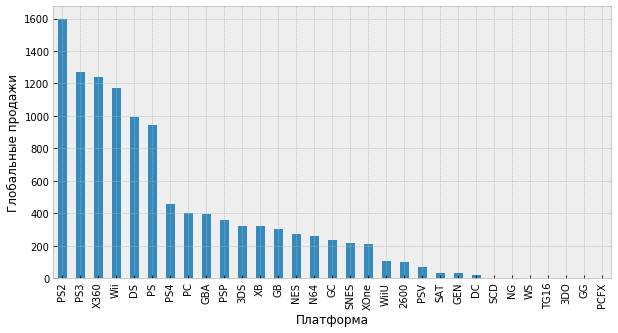

In [56]:
bar_plot(total_sales_per_platform_for(df_games))

Выберем платформы с наибольшими глобальными продажами, например, первые 5 из списка выше и построим распределение по годам.

In [57]:
top5_platform = total_sales_per_platform_for(df_games).head(5)
top5_platform

,total_sales
platform,
PS2,1595.06
PS3,1269.94
X360,1242.18
Wii,1169.72
DS,995.01


In [58]:
#Глобальные продажи по платформе по годам
def yearly_total_sales_by_platform(name, df):
    return (
        df
            .query("platform == @name")
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False)
    )

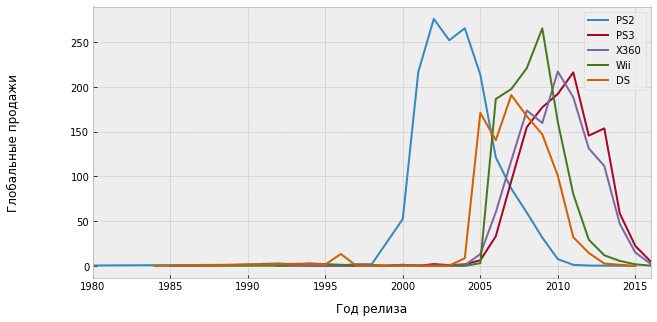

In [60]:
# Линейный график глобальных продаж по платформе по годам
for platform in list(top5_platform.index):
    yearly_total_sales_by_platform(platform, df_games)['total_sales'].plot(figsize=(10, 5), label=platform)
    plt.xlabel("Год релиза", labelpad=10)
    plt.ylabel("Глобальные продажи", labelpad=50)
    plt.legend()

In [61]:
actual_years = (df_games['year_of_release'] > 2006) & (df_games['year_of_release'] <= 2016)
actual_games = df_games.loc[actual_years]

#### Вывод
Примерно за 10 лет появляются новые и исчезают старые платформы. Таким образом, мы еще раз убедились, что данные за все периоды нам не понадобятся – достаточно определить актуальный период в 10 лет и смотреть на игры на современных платформах.

## Какие платформы лидируют по продажам, растут или падают

Глобальные продажи за актуальный период:

In [62]:
total_sales = total_sales_per_platform_for(actual_games)

какие платформы лидируют по продажам:

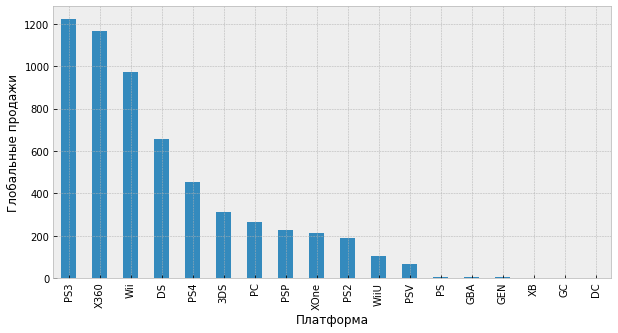

In [63]:
bar_plot(total_sales)

Какие из них растут или падают?

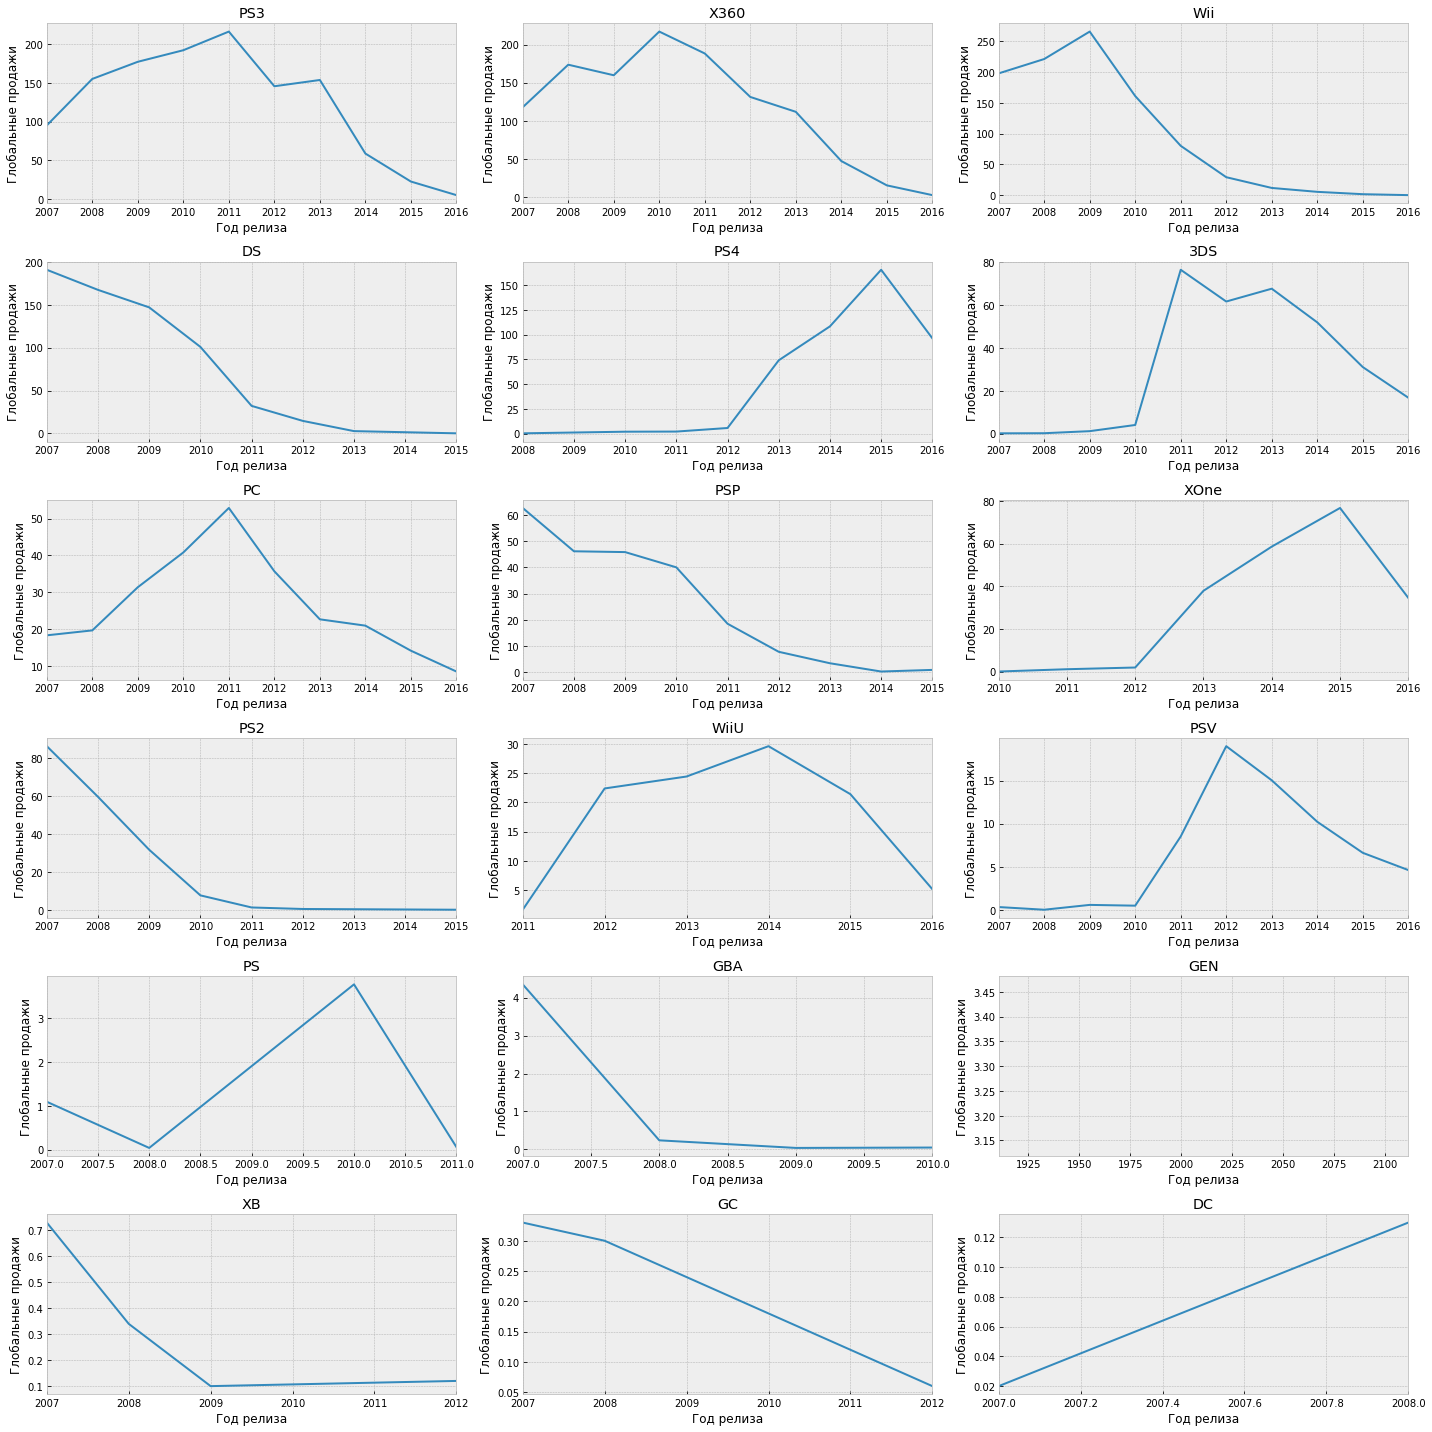

In [64]:
import warnings
warnings.filterwarnings('ignore')

# список платформ за актуальный период
platforms = list(total_sales.index)

# график из 6 строк
rows = 6
cols = (len(platforms) // rows)
fig, ax = plt.subplots(rows, cols)

# построение графиков продаж по каждой платформе
num = 0
for row in range(rows):
    for col in range(cols):
        platform = platforms[num]
        (
            yearly_total_sales_by_platform(platform, actual_games)['total_sales']
                .plot(ax=ax[row, col], figsize=(20, 20), title=platform)
                .set(xlabel='Год релиза', ylabel='Глобальные продажи')
        )
        num += 1

plt.tight_layout()
plt.show()

### Вывод
По графикам видим, что несмотря на лидирующие продажи за актуальный период, эра большинства платформ подходит к концу и продажи значительно падают. Из перспективных – консоли нового поколения:

PS4: ~100 млн.
XOne: ~40 млн.
Из портативных только 3DS от Nintendo пока еще держится в топе по продажам за 2016 год (около 20 млн).

Объем продаж компьютерных игр с каждым годом все меньше.

Рассмотрим детальнее платформы от Sony и Microsoft.

## «Ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам

Среднее значение глобальных продаж игр для PS4: 56.82250000000003
Среднее значение глобальных продаж игр для XOne: 30.11428571428572


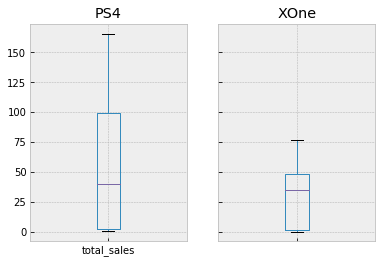

In [65]:
promising_platforms = ['PS4', 'XOne']

fig, axs = plt.subplots(1, 2, sharey=True)

# построение графиков продаж по каждой платформе
for num, platform in enumerate(promising_platforms):
    df = yearly_total_sales_by_platform(platform, actual_games)
    print(f"Среднее значение глобальных продаж игр для {platform}: {df['total_sales'].mean()}")
    df.boxplot('total_sales', ax=axs[num])
    axs[num].set_title(platform)

plt.tick_params(labelcolor='none', bottom='off')
plt.subplots_adjust(left=0.1)
plt.show()

### Вывод
Сумма глобальных продаж игр для PS4 примерно в 2 раза больше чем у Xbox One.

## Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков

In [66]:
ps4 = actual_games.query("platform == 'PS4'")
xone = actual_games.query("platform == 'XOne'")

In [67]:
features = ['user_score', 'critic_score', 'total_sales']
ps4[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.554748,-0.063039
critic_score,0.554748,1.000000,0.360007
total_sales,-0.063039,0.360007,1.000000


In [68]:
xone[features].corr()

,user_score,critic_score,total_sales
user_score,1.000000,0.578523,-0.070995
critic_score,0.578523,1.000000,0.354611
total_sales,-0.070995,0.354611,1.000000


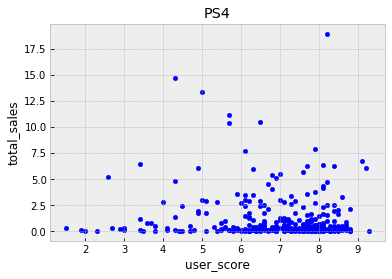

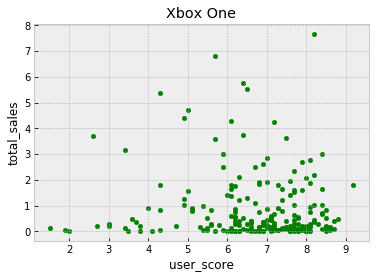

In [69]:
ps4.plot(x='user_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='user_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

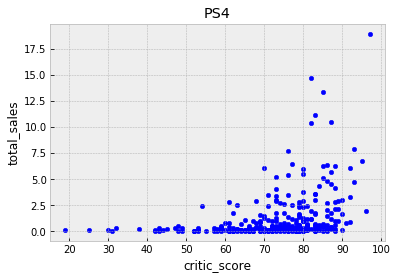

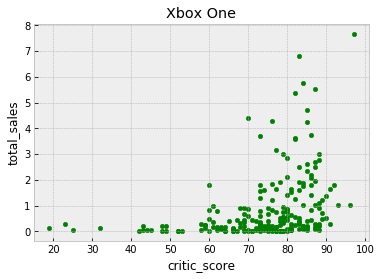

In [70]:
ps4.plot(x='critic_score', y='total_sales', kind='scatter', title='PS4')
xone.plot(x='critic_score', y='total_sales', kind='scatter', title='Xbox One', color='green')
plt.show()

### Выводы:

* Взаимосвязи между отзывами пользователей и продажами нет;
* Взаимосвязь между отзывами критиков и продажами существует, однако не слишком большая;
* Взаимосязь между отзывами критиков и отзывами пользователей существует, чуть большая чем между отзывами критиков и продажами.
* Корреляция не говорит о причинно-следственной связи. И хотя по диаграммам рассеяния видим, что чем выше оценки критиков, тем выше продажи игр на обоих платформах, мы не можем утверждать, что высокие оценки критиками приводят к высоким продажам игр, а при покупке игры пользователи больше доверяют критикам, а не другим геймерам.

## Распределение игр по жанрам

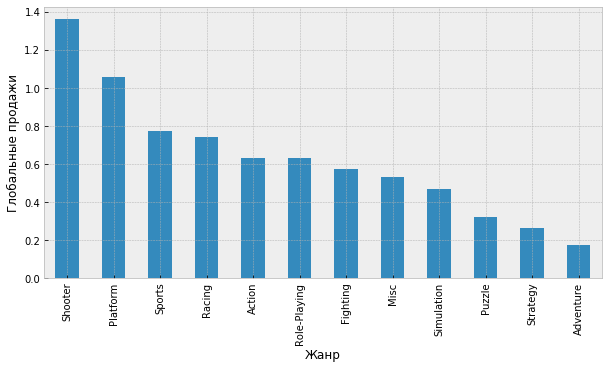

In [71]:
(actual_games
    .pivot_table(index='genre', values='total_sales')
    .sort_values('total_sales', ascending=False)
    .plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False)
    .set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

### Выводы
Самыми популярными жанрами являются шутеры, платформеры, а также спортивные игры. Хуже всего продаются стратегии и квесты. Но стоит учитывать региональные продажи, т.к., например, в Японии картина по жанрам может быть совсем другой.

# 4. Портрет пользователя каждого региона

## NA / North America

In [86]:
region_na = 'na_sales'

In [91]:
def top5_in_region(column,region):
    return (
        actual_games
            .pivot_table(index=column, values=region, aggfunc='sum')
            .sort_values(region, ascending=False)
            .head(5)
    )

In [92]:
def sales_pie_by_region(df,region):
    (
        df
            .plot(kind='pie', y=region, autopct='%1.0f%%', figsize=(10, 5), legend=False)
            .set(ylabel='Продажи')
    )
    plt.show()

### Самые популярные платформы в North America (топ-5)

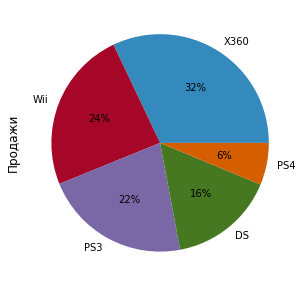

In [93]:
sales_pie_by_region(top5_in_region('platform',region_na),region_na)

### Вывод
В США более популярна XBOX – Microsoft старается удержаться на родном рынке. Даже Wii немного обходит консоль Sony по продажам.

### Самые популярные жанры в North America (топ-5)

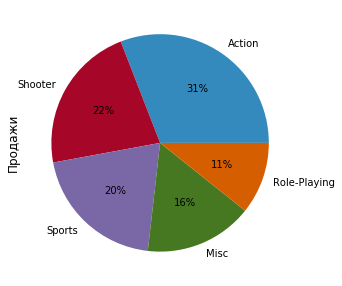

In [94]:
sales_pie_by_region(top5_in_region('genre',region_na),region_na)

### Вывод
Экшены и шутеры – самые популярные жанры.

### Влияет ли рейтинг ESRB на продажи в North America

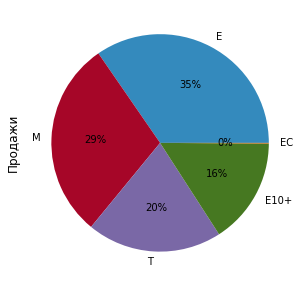

In [95]:
sales_pie_by_region(top5_in_region('rating',region_na),region_na)

### Выводы
Большая доля игр приходится на игры, подходящие для детей, и только 29% продаж на игры для взрослой аудитории (17+)

## EU / Europe

In [80]:
region_eu = 'eu_sales'

### Самые популярные платформы в Europe (топ-5) 

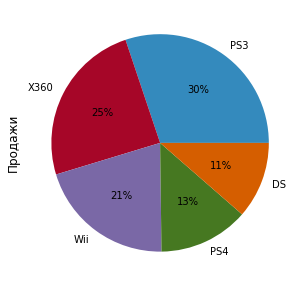

In [96]:
sales_pie_by_region(top5_in_region('platform',region_eu),region_eu)

### Вывод 
В Европе более популярна PlayStation, Microsoft в догонящих. Присутствие Wii в Старом Свете еще меньше, чем в США.

## Самые популярные жанры в Europe (топ-5)

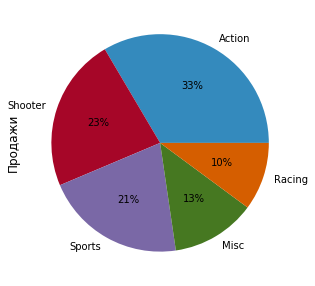

In [97]:
sales_pie_by_region(top5_in_region('genre',region_eu),region_eu)

### Вывод
Экшены и шутеры – все также самые популярные жанры. Надежда на Японию.

### Влияет ли рейтинг ESRB на продажи в Europe

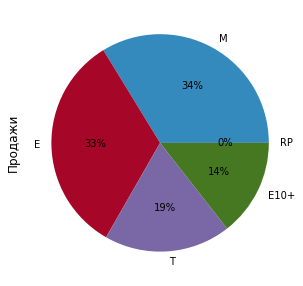

In [98]:
sales_pie_by_region(top5_in_region('rating',region_eu),region_eu)

### Вывод
В Европе лучше продаются игры для взрослой аудитории: 35% продаж вместо 29%.

## JP / Japan

In [100]:
region_jp = 'jp_sales'

### Самые популярные платформы в Japan (топ-5)

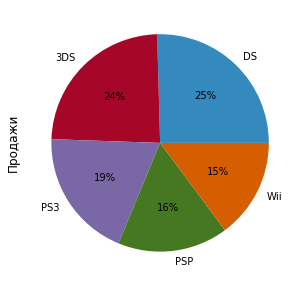

In [101]:
sales_pie_by_region(top5_in_region('platform',region_jp),region_jp)

### Вывод
В Японии картина продаж кардинально меняется. Японцы много играют на портативных консолях типа Nintento (3)DS, PSP и пр. Здесь мы практически не видим присутствия Xbox в пятерке лидеров.

### Самые популярные жанры в Japan (топ-5)

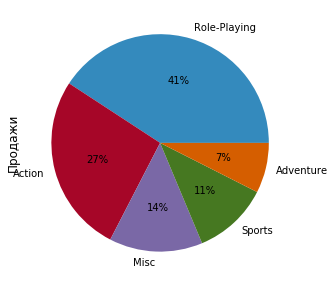

In [102]:
sales_pie_by_region(top5_in_region('genre',region_jp),region_jp)

### Вывод
Ролевые игры (JRPG) – самые популярные. О Final Fantasy слышали многие и за пределами Японии, но в целом JRPG – явление довольно уникальное. К слову, экшены отстают по продажам примерно в полтора раза.

### Влияет ли рейтинг ESRB на продажи в Japan

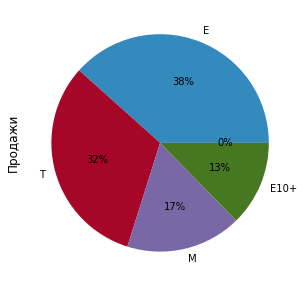

In [103]:
sales_pie_by_region(top5_in_region('rating',region_jp),region_jp)

### Вывод
В Японии хуже всего продаются игры для взрослой аудитории – всего 17% продаж.

# 5. Проверка гипотез

Для каждой из приведенных ниже гипотез проверим две (двусторонние) гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам. Чтобы понять, различаются ли пользовательские рейтинги и значима ли разница между средними значениями, проведем статистические тесты.

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Мы рассматриваем две генеральные сопокупности – игры на разных платформах.

Нулевая гипотеза H₀:

>Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

>Средние пользовательские рейтинги платформ Xbox One и PC различаются.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 3%. На это есть 2 причины:

1. Большое количество пропусков в датасете.
2. Microsoft в последнее время активно развивает геймерские возможности в Windows.

In [106]:
alpha = 0.03

In [107]:
pc = actual_games.query("platform == 'PC'")

results = st.ttest_ind(
    xone['user_score'],
    pc['user_score'],
    equal_var=False,  # Welch’s t-test, который не предполагает равенство дисперсий
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.03017918134321769
Не получилось отвергнуть нулевую гипотезу


In [111]:
print('Средний рейтинг пользователей PC - {}'.format(pc['user_score'].mean()))

Средний рейтинг пользователей PC - 6.946921797004992


In [112]:
print('Средний рейтинг пользователей XBOX ONE - {}'.format(xone['user_score'].mean()))

Средний рейтинг пользователей XBOX ONE - 6.694174757281553


### Вывод
p-value получили равным ~3%. Если бы рейтинги пользователей НЕ отличались (наша нулевая гипотеза), то те различия, что мы фактически видим, могли бы получиться случайно лишь в 3% случаев. Это весьма маленькая вероятность. Таким образом, различия довольно высокие для предположения равенства рейтингов. Но так как мы задали жесткий уровень значимости (0.03), то говорим, что тем не менее не будем отклонять гипотезу, но со стандартным уровнем в 0.05 мы бы ее уже отвергли.

Гипотеза Средние пользовательские рейтинги платформ Xbox One и PC одинаковые **подтвердилась**.

## Средние пользовательские рейтинги жанров Action и Sports разные

Мы рассматриваем две генеральные сопокупности – игры разных жанров.

Нулевая гипотеза H₀:

>Средние пользовательские рейтинги жанров Action и Sports одинаковые.

Исходя из H₀ формулируем альтернативную гипотезу H₁:

>Средние пользовательские рейтинги жанров Action и Sports различаются.

Пороговое значение alpha (критический уровень статистической значимости) зададим равным 5%.

In [113]:
alpha = 0.05

In [114]:
action = actual_games.query("genre == 'Action'")
sports = actual_games.query("genre == 'Sports'")

results = st.ttest_ind(
    action['user_score'],
    sports['user_score'],
    nan_policy='omit' # игнорируем пропуски
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.8629106791612717e-10
Отвергаем нулевую гипотезу


### Вывод
Средние пользовательские рейтинги различаются, и практически нулевая вероятность говорит о том, что случайно получить такое отличие в значениях практически не получится.

Гипотеза Средние пользовательские рейтинги жанров Action и Sports разные **подтвердилась**.

# 6. Общий вывод

ИТОГ:

1. Очевидно, что самые популярные платфорым на сегодня это Sony PlayStation 4 и Xbox One. Они появились пару лет назад и имеют потенциал роста.
2. Все платформы живут ~10 лет.
2. В США и Европе лучше всего продаются шутеры и экшены.
3. В Японии рынок другой, там популярные РПГ и преоритет платформ идет на портативку.
4. Самые большие продажи на игры где разрешено детям.

Обе сформулированные гипотезы подтвердились:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Так что стоит обратить внимание зависимости, что у каждой консоли есть эксклюзивы, из-за которых покупают ту или иную консоль. Так же, есть игры с огромным бюджетом(блокбастеры), которые влияют на продажи и могут повлиять на определенную прибль определенного жанра.